# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "assignment_2"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os 
import seaborn as sns
# Your code goes here for this section.
import pandas as pd

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def load_housing_cost_data():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv('./housing.csv')
  return housing

housing = load_housing_cost_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.info()
housing.describe()
print(housing.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
(20640, 10)


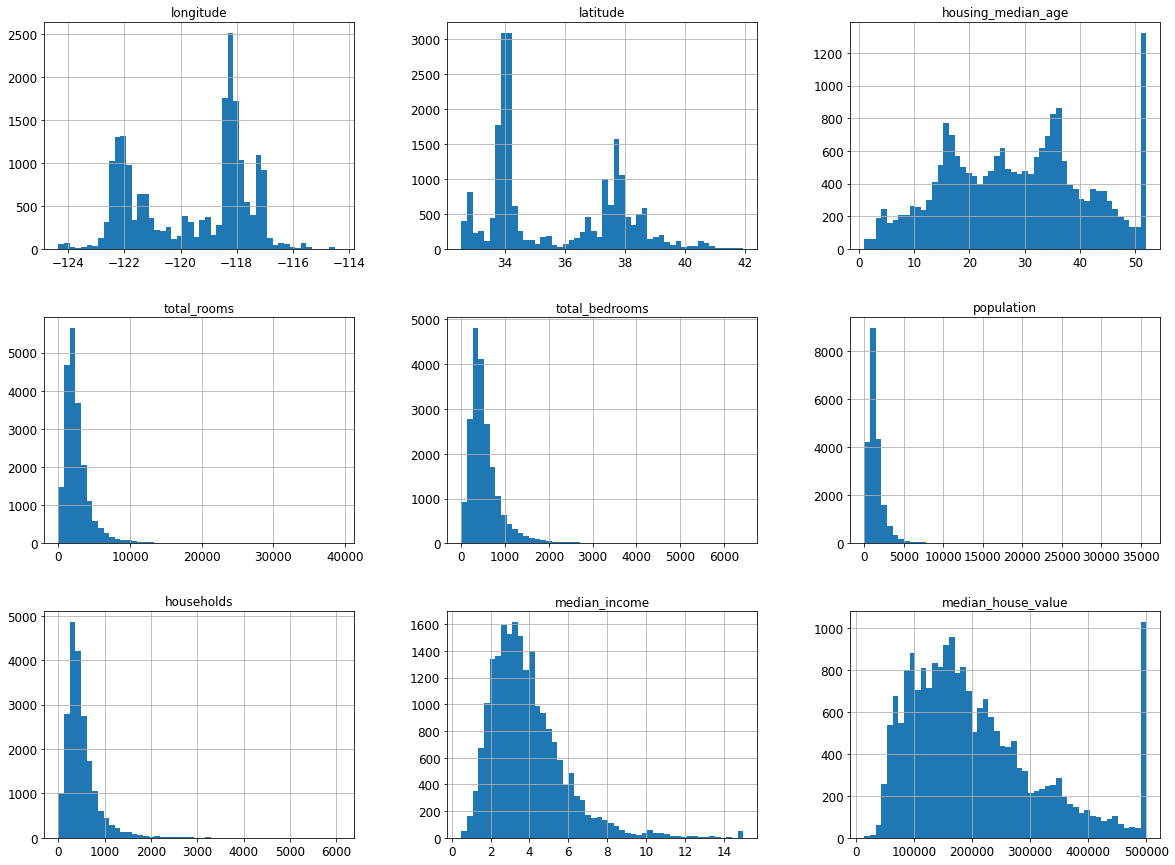

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")

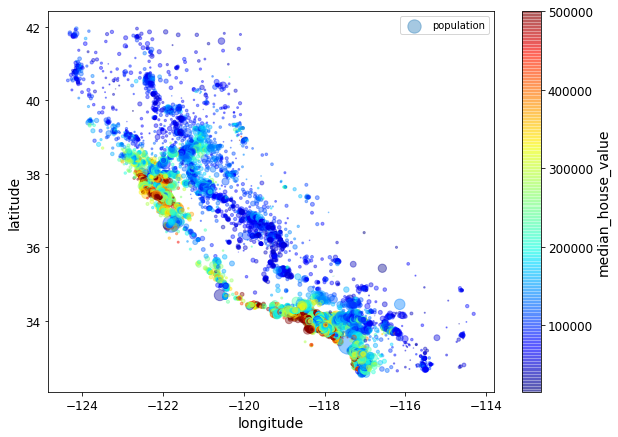

In [5]:
# Incorporate the population into the circle size
# Add color (jet map) for the value of the housing
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# save_fig("housing_prices_scatterplot")

In [6]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

(9, 9)

In [7]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dc66421d0>,
      dtype=object)

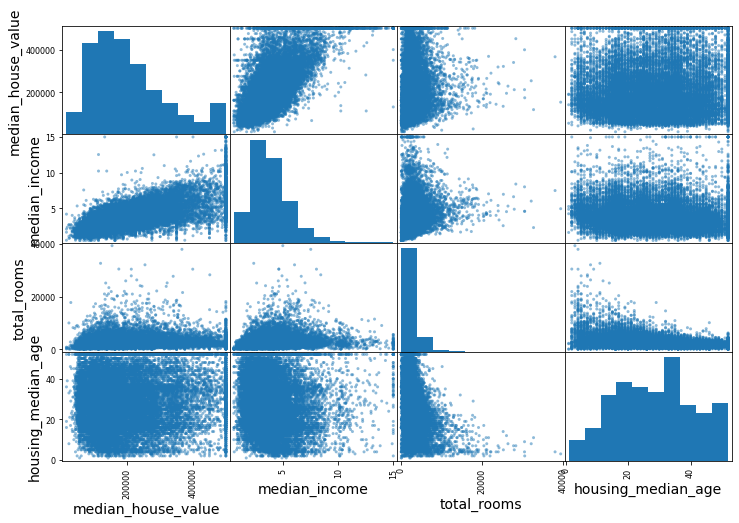

In [8]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

(0.0, 16.0, 0.0, 550000.0)

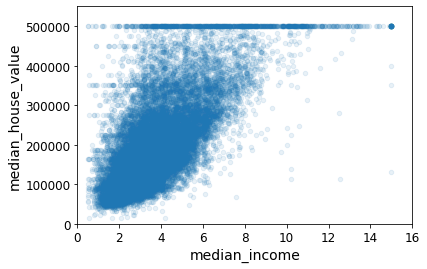

In [9]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
# save_fig("income_vs_house_value_scatterplot")

In [10]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [11]:
# Third option is to fill the missing values with something reasonable (zero, mean, median, ect)
# .fillna() will get this done
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [12]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [13]:
# Scikit-Learn has a handy class to take care of this: the SimpleImputer class.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [14]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
len(housing['ocean_proximity'].unique())

5

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
X = housing
y = housing['ocean_proximity']

In [19]:
labelEn = LabelEncoder()
X['ocean_proximity'] = labelEn.fit_transform(X['ocean_proximity'])
y = labelEn.transform(y)


In [20]:
X['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [21]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [22]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [23]:
new_X = StandardScaler().fit_transform(X)
print(new_X)

[[-1.32783522  1.05254828  0.98214266 ...  2.34476576  2.12963148
   1.2910888 ]
 [-1.32284391  1.04318455 -0.60701891 ...  2.33223796  1.31415614
   1.2910888 ]
 [-1.33282653  1.03850269  1.85618152 ...  1.7826994   1.25869341
   1.2910888 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -1.14259331 -0.99274649
  -0.11673923]
 [-0.87362627  1.77823747 -0.84539315 ... -1.05458292 -1.05860847
  -0.11673923]
 [-0.83369581  1.75014627 -1.00430931 ... -0.78012947 -1.01787803
  -0.11673923]]


In [24]:
Col_data = ['longitude', 'latitude', 'median_income']
X_dataf = housing[Col_data]
X_dataf.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

In [25]:
F_X = StandardScaler().fit_transform(X_dataf)
F_X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [26]:
from math import *
from decimal import Decimal
from sklearn.datasets import make_blobs
import plotly.express as px
import numpy as np
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
class KMeans:
  #def p_distance(value, root):
     
    #root_value = 1 / float(root)
    #return root_value

  def minkowski_distance(ini_x, ini_y, p_value):
    sum = 0
    for a, b in zip(ini_x, ini_y):
      abs_val = abs(a-b)
      powerP = pow(abs_val, p_value)
      sum = sum + powerP
    return np.power(sum, 1/p_value)
    #   summationS = sum(powerP, p_value)
    #return (p_distance(summationS))
  
  def __init__(self, F_X, num_clusters):
        self.K = num_clusters
        self.iters = 100
        self.feasure_size1 = F_X.shape
        self.feasure_size2 = F_X.shape
      
  def initialKcentroids(self, F_X):
    list_centroids = np.zeros((self.K, self.num_features))
    for k in range(self.K):
        temp_centroid = F_X[np.random.choice(range(self.feasure_size1))]
        list_centroids[k] = temp_centroid
    return list_centroids
    
  def Assign_cluster_using_Euclidean(self, F_X, list_centroids):
      list_Euclidea_clusters = [[] for _ in range(self.K)]
      for point_idx, point in enumerate(X):
          closest_centroid = np.argmin(
              KMeans.minkowski_distance(point, list_centroids, 2)
              #KMeans.p_distance(sum(pow(abs(a-b), 2) for a, b in zip(point, centroids)), 2)
          ) 
          list_Euclidea_clusters[closest_centroid].append(point_idx)
      return list_Euclidea_clusters 
    
  def Assign_cluster_using_Mahattan(self, F_X, list_centroids):
      list_Mahattan_clusters = [[] for _ in range(self.K)]
      for point_idx, point in enumerate(X):
          closest_centroid = np.argmin(
              KMeans.minkowski_distance(point, list_centroids, 1)
              #KMeans.p_distance(sum(pow(abs(a-b), 2) for a, b in zip(point, centroids)), 2)
          ) 
          list_Mahattan_clusters[closest_centroid].append(point_idx)
      return list_Mahattan_clusters 
   
  def centroids_recalculation(self, cluster, F_X):
      new_list_centroids = np.zeros((self.K, self.num_features))
      for num, cluster in enumerate(cluster):
          new_list_centroids[num] = np.mean(X[cluster], axis=0)
      return new_list_centroids
    
  def predict(self, clusters, F_X):
      y_predict = np.zeros(self.feasure_size1) # row1 fillup with zero
      for i, cluster in enumerate(clusters):
          for j in cluster:
              y_predict[j] = i
      print(y)
      return y_predict

  def fit(self, F_X):
        for _ in range(self.iters):
            clusters_Euclidean = self.Assign_cluster_using_Euclidean(F_X, self.initialKcentroids(F_X))
            clusters_Mahattan = self.Assign_cluster_using_Mahattan(F_X, self.initialKcentroids(F_X))
            if clusters_Euclidean < clusters_Mahattan:
              min_clusters = clusters_Euclidean
            else:
              min_clusters = clusters_Mahattan
            distance_diff = self.centroids_recalculation(min_clusters, F_X) - self.initialKcentroids(F_X)
        new_y_predict = self.predict(min_clusters, F_X) # predict function
        
        return new_y_predict


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [27]:
# Your code goes here
from sklearn import cluster
my_kmeans = cluster.KMeans(n_clusters=2, init='k-means++')
#kmeans = KMeans(n_clusters=2)
model=my_kmeans.fit(F_X)
centers = model.cluster_centers_
centers[:5]

array([[-1.07195431,  1.08595775, -0.03737904],
       [ 0.78153794, -0.79174753,  0.02725222]])

In [28]:
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Clusters
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,1


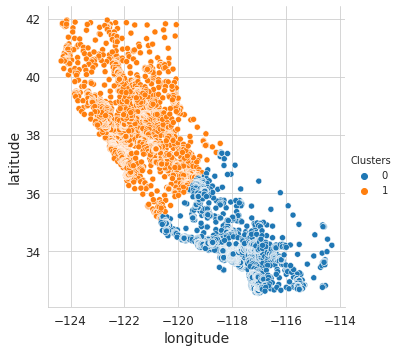

In [29]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='Clusters', data=housing, kind='scatter');

In [42]:
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                   \
                      count           mean           std       min       25%   
Clusters                                                                       
0                    4091.0  229929.021755  92377.186784   14999.0  166700.0   
1                     752.0   88103.454787  29207.728020   14999.0   67800.0   
2                    2895.0  221380.263903  92589.083111   40000.0  151750.0   
3                     256.0  481959.390625  54410.846022  112500.0  500001.0   
4                    3749.0  170981.203521  78045.197738   14999.0  116400.0   
5                     250.0  461634.276000  72441.442511  131300.0  442600.0   
6                    1410.0  139542.984397  68908.383869   22500.0   93400.0   
7                    1721.0  334322.976177  99707.736050   67500.0  259300.0   
8                    1552.0  306203.222938  97126.951525   67500.0  237325.0   
9                    1532.0  103162.468668  66161.243069   26600.0   60675.0   
10                   2432.0  138371.016447  73396.687705   22500.0   89400.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0         208200.0  265500.0  500001.0        4091.0   4.337109  0.566138   
1          83000.0  101950.0  277000.0         752.0   2.376014  0.704886   
2         202800.0  268700.0  500001.0        2895.0   3.970308  0.523278   
3         500001.0  500001.0  500001.0         256.0  11.252162  1.911801   
4         157700.0  199700.0  500001.0        3749.0   2.491372  0.624353   
5         500001.0  500001.0  500001.0         250.0  10.180859  1.940907   
6         129200.0  164100.0  500001.0        1410.0   2.623147  0.752936   
7         318300.0  404300.0  500001.0        1721.0   6.573850  0.891382   
8         292100.0  370125.0  500001.0        1552.0   6.008256  0.811167   
9          80650.0  115350.0  500001.0        1532.0   2.643436  0.900236   
10        118700.0  163225.0  500001.0        2432.0   2.349515  0.583584   

                                                          
             min       25%       50%        75%      max  
Clusters                                                  
0         3.3750  3.862800   4.25540   4.798600   5.4618  
1         0.4999  1.848450   2.30145   2.848200   5.0329  
2         3.0000  3.541700   3.95830   4.395800   5.2149  
3         8.9063  9.833975  10.55555  12.388450  15.0001  
4         0.4999  2.054200   2.57140   3.035700   3.5000  
5         8.0755  8.521150   9.88000  10.924950  15.0001  
6         0.5360  2.071650   2.62500   3.210300   4.6154  
7         5.4533  5.858700   6.32980   7.126400   8.9088  
8         4.9107  5.324500   5.81345   6.521925   8.0839  
9         0.4999  1.955900   2.57350   3.216100   5.2134  
10        0.4999  1.972575   2.47240   2.798300   3.5714

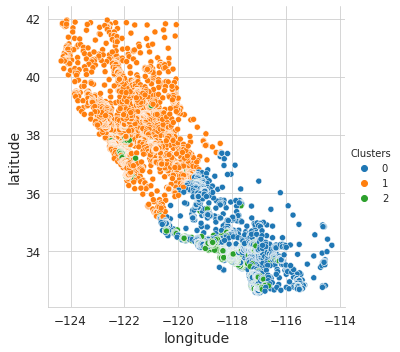

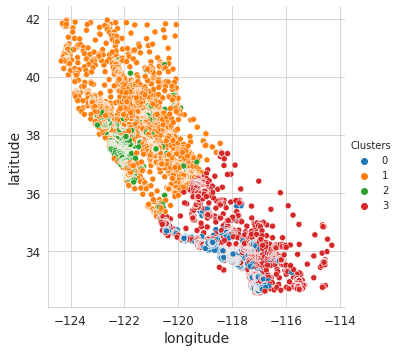

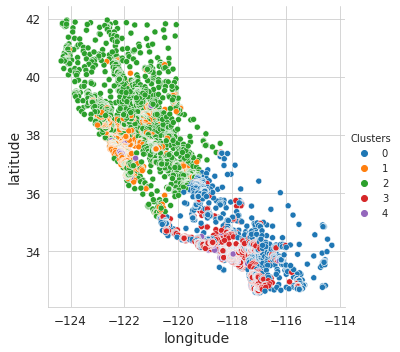

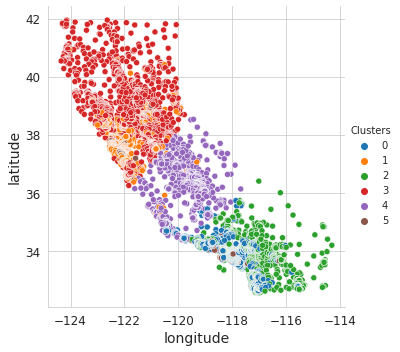

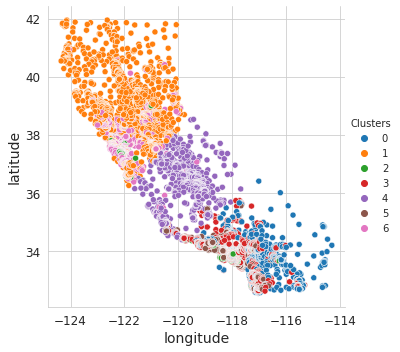

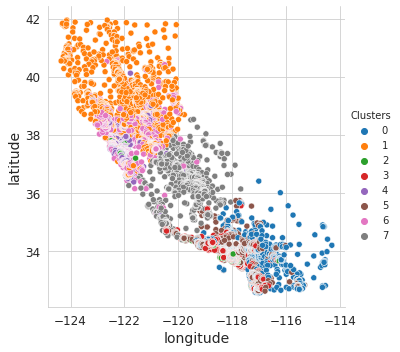

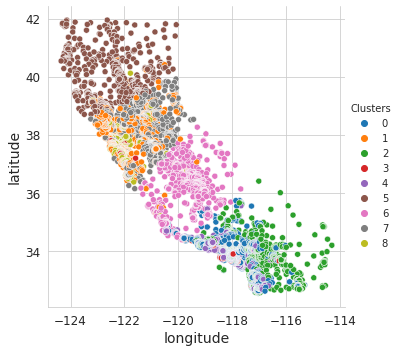

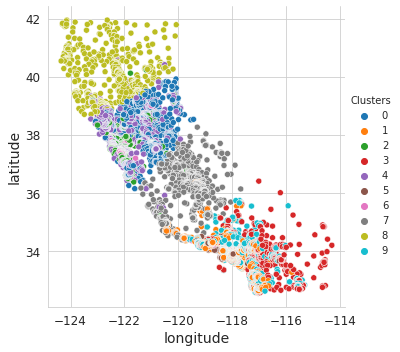

In [43]:
for i in range(3,11):
  my_kmeans = cluster.KMeans(n_clusters=i, init='k-means++')
  model = my_kmeans.fit(F_X)
  centers = model.cluster_centers_
  housing['Clusters'] = my_kmeans.fit_predict(F_X)
  housing['Clusters'] = housing['Clusters'].astype("category")
  sns.set_style('whitegrid')
  sns.relplot(x='longitude', y='latitude', hue='Clusters', data=housing, kind='scatter');

In [44]:
my_kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                   \
                      count           mean            std      min       25%   
Clusters                                                                       
0                    8358.0  189927.455851  109156.799398  14999.0  101225.0   
1                    9951.0  184722.376043   91550.624635  14999.0  122800.0   
2                    2331.0  362041.193050  110508.308664  67500.0  270100.0   

                                       median_income                      \
               50%       75%       max         count      mean       std   
Clusters                                                                   
0         162500.0  254500.0  500001.0        8358.0  3.616826  1.477914   
1         167800.0  223100.0  500001.0        9951.0  3.249321  1.088402   
2         350200.0  500001.0  500001.0        2331.0  7.433388  2.121278   

                                                   
             min     25%     50%     75%      max  
Clusters                                           
0         0.4999  2.5195  3.4057  4.5336   8.6340  
1         0.4999  2.3882  3.2125  4.0893   5.5842  
2         5.0380  5.9503  6.6369  8.2420  15.0001

In [45]:
my_kmeans = cluster.KMeans(n_clusters=4, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                   \
                      count           mean            std      min       25%   
Clusters                                                                       
0                    6266.0  154635.389563   89433.537859  14999.0   88900.0   
1                    8811.0  177227.036659   87956.579063  14999.0  117250.0   
2                    2424.0  307269.057343  109673.667900  67500.0  225975.0   
3                    3139.0  316722.234788  113279.801794  47500.0  226950.0   

                                       median_income                      \
               50%       75%       max         count      mean       std   
Clusters                                                                   
0         130850.0  194575.0  500001.0        6266.0  2.911436  0.883552   
1         162500.0  214050.0  500001.0        8811.0  3.036369  0.933929   
2         288150.0  382200.0  500001.0        2424.0  6.106404  1.738968   
3         292900.0  403100.0  500001.0        3139.0  6.400835  1.827535   

                                                       
             min      25%      50%       75%      max  
Clusters                                               
0         0.4999  2.24325  2.94055  3.625000   4.6650  
1         0.4999  2.30385  3.07730  3.788800   4.7361  
2         4.4209  4.98245  5.57275  6.613175  15.0001  
3         4.7068  5.18850  5.82830  6.864400  15.0001

In [46]:
my_kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                    \
                      count           mean            std       min       25%   
Clusters                                                                        
0                    4502.0  264873.737228  102756.357110   14999.0  187425.0   
1                    5503.0  144554.231147   83860.791342   14999.0   85500.0   
2                     599.0  462970.125209   70210.421024  112500.0  450700.0   
3                    7011.0  165121.789759   83126.048984   14999.0  108200.0   
4                    3025.0  279858.707107  104604.066923   67500.0  198400.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0         240550.0  326000.0  500001.0        4502.0   5.196520  0.983185   
1         120500.0  179750.0  500001.0        5503.0   2.730593  0.779147   
2         500001.0  500001.0  500001.0         599.0  10.323481  2.059349   
3         152500.0  197900.0  500001.0        7011.0   2.708918  0.752694   
4         265600.0  347400.0  500001.0        3025.0   5.386272  1.131979   

                                                        
             min       25%      50%       75%      max  
Clusters                                                
0         3.9167  4.369425   5.0000   5.82310   8.2374  
1         0.4999  2.168150   2.7566   3.36175   4.3958  
2         7.5696  8.601550  10.0549  11.10975  15.0001  
3         0.4999  2.144800   2.7500   3.32610   4.0298  
4         3.9063  4.500000   5.0893   6.02660   9.5551

In [47]:
my_kmeans = cluster.KMeans(n_clusters=6, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                    \
                      count           mean            std       min       25%   
Clusters                                                                        
0                    2813.0  285523.777462  103496.708144   67500.0  206700.0   
1                    4225.0  270842.571834  102174.670364   14999.0  193200.0   
2                    6538.0  172303.436831   81436.371307   14999.0  117225.0   
3                    1657.0  104824.444176   68641.489341   26600.0   61500.0   
4                     579.0  463750.944732   70320.077287  112500.0  452950.0   
5                    4828.0  156025.277133   86542.733318   14999.0   94200.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0         269600.0  351400.0  500001.0        2813.0   5.483355  1.128860   
1         245000.0  332600.0  500001.0        4225.0   5.284728  0.980226   
2         158300.0  201700.0  500001.0        6538.0   2.783490  0.770576   
3          81600.0  117700.0  500001.0        1657.0   2.620655  0.883397   
4         500001.0  500001.0  500001.0         579.0  10.398594  2.051806   
5         133700.0  192225.0  500001.0        4828.0   2.811998  0.798561   

                                                         
             min      25%       50%        75%      max  
Clusters                                                 
0         3.9219  4.60000   5.18570   6.095700   9.5551  
1         3.9224  4.48210   5.08390   5.927500   8.2531  
2         0.4999  2.19790   2.85110   3.415075   4.1293  
3         0.4999  1.93860   2.55560   3.208300   5.0100  
4         7.5696  8.71480  10.09140  11.187300  15.0001  
5         0.4999  2.22635   2.86665   3.472200   4.5590

In [48]:
my_kmeans = cluster.KMeans(n_clusters=7, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                    \
                      count           mean            std       min       25%   
Clusters                                                                        
0                    1643.0  103846.745587   66930.517660   26600.0   61350.0   
1                    4663.0  159367.453142   75709.895621   14999.0  107500.0   
2                    4513.0  224911.927764   91840.539955   14999.0  163300.0   
3                    2812.0  284938.079659  103048.214563   67500.0  206475.0   
4                    1810.0  334951.472376  100990.093647   67500.0  258000.0   
5                    4819.0  155959.439303   86539.605752   14999.0   94200.0   
6                     380.0  478024.502632   65461.233793  112500.0  500001.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0          81300.0  117350.0  500001.0        1643.0   2.605805  0.877364   
1         146900.0  187500.0  500001.0        4663.0   2.425018  0.606306   
2         201200.0  259400.0  500001.0        4513.0   4.236591  0.582928   
3         269250.0  350175.0  500001.0        2812.0   5.471451  1.114281   
4         318900.0  409875.0  500001.0        1810.0   6.581366  0.955551   
5         133600.0  192150.0  500001.0        4819.0   2.811226  0.797866   
6         500001.0  500001.0  500001.0         380.0  11.411639  1.831395   

                                                           
             min        25%       50%        75%      max  
Clusters                                                   
0         0.4999   1.935850   2.54170   3.174450   5.2561  
1         0.4999   2.000000   2.49220   2.948750   3.5735  
2         3.1989   3.728600   4.15380   4.703100   5.4349  
3         3.9219   4.593175   5.17880   6.087950   9.1881  
4         5.3765   5.795450   6.30905   7.155325   9.6023  
5         0.4999   2.227350   2.86570   3.470550   4.5590  
6         8.2737  10.114600  10.73470  12.457175  15.0001

In [49]:
my_kmeans = cluster.KMeans(n_clusters=8, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                    \
                      count           mean            std       min       25%   
Clusters                                                                        
0                    4503.0  224110.199423   91637.222993   14999.0  163000.0   
1                    3313.0  234180.252641   92301.482714   40000.0  164000.0   
2                     294.0  481153.540816   58752.223900  112500.0  500001.0   
3                    4624.0  159020.919766   75524.203120   14999.0  107200.0   
4                    1638.0  104085.594017   67453.064908   26600.0   61300.0   
5                    1016.0  362100.001969  100645.928619   75000.0  281875.0   
6                    1846.0  332885.460997  100760.193419   67500.0  255725.0   
7                    3406.0  133538.583676   74772.764949   14999.0   85000.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0         200300.0  257750.0  500001.0        4503.0   4.217272  0.578182   
1         221500.0  281000.0  500001.0        3313.0   4.340188  0.684144   
2         500001.0  500001.0  500001.0         294.0  11.769801  1.914753   
3         146600.0  187500.0  500001.0        4624.0   2.417703  0.603489   
4          81300.0  117025.0  500001.0        1638.0   2.609214  0.874851   
5         356400.0  452000.0  500001.0        1016.0   7.115252  1.267312   
6         316700.0  404150.0  500001.0        1846.0   6.536471  0.942115   
7         112500.0  159125.0  500001.0        3406.0   2.440439  0.639716   

                                                           
             min        25%       50%        75%      max  
Clusters                                                   
0         3.1757   3.714700   4.13990   4.685200   5.4349  
1         2.9085   3.761700   4.25890   4.895300   5.8453  
2         9.0267  10.157675  11.13925  13.183475  15.0001  
3         0.4999   1.997600   2.48190   2.937500   3.5735  
4         0.4999   1.941700   2.54900   3.171900   5.2561  
5         5.7211   6.134275   6.71080   7.719800  11.0492  
6         5.2990   5.759250   6.27540   7.087025   9.2858  
7         0.4999   2.007775   2.51845   2.944325   4.1099

In [50]:
my_kmeans = cluster.KMeans(n_clusters=9, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                    \
                      count           mean            std       min       25%   
Clusters                                                                        
0                    3150.0  152590.832698   81754.052704   22500.0   96225.0   
1                    4689.0  159566.673918   75793.773664   14999.0  107600.0   
2                    1783.0  335735.145261  100991.862826   67500.0  259250.0   
3                    4498.0  225618.370831   92040.662746   14999.0  163825.0   
4                    2974.0  241676.959650   92296.383536   40000.0  171925.0   
5                     921.0  368512.159609  100785.997243   75000.0  288100.0   
6                    1561.0  105328.060858   69281.091507   26600.0   60800.0   
7                     280.0  481459.750000   58778.522600  112500.0  500001.0   
8                     784.0   89049.487245   30731.218418   14999.0   68125.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0         130950.0  183800.0  500001.0        3150.0   2.586652  0.661522   
1         147200.0  187500.0  500001.0        4689.0   2.430538  0.608695   
2         319800.0  410350.0  500001.0        1783.0   6.601249  0.952998   
3         201950.0  260925.0  500001.0        4498.0   4.251104  0.585579   
4         229950.0  289575.0  500001.0        2974.0   4.525914  0.649448   
5         365900.0  466900.0  500001.0         921.0   7.267672  1.274477   
6          81100.0  118800.0  500001.0        1561.0   2.631148  0.892001   
7         500001.0  500001.0  500001.0         280.0  11.871157  1.897156   
8          83800.0  102750.0  295400.0         784.0   2.384783  0.718154   

                                                           
             min        25%       50%        75%      max  
Clusters                                                   
0         0.4999   2.153050   2.66185   3.125000   3.8333  
1         0.4999   2.004400   2.50000   2.960500   3.5735  
2         5.3765   5.840300   6.33030   7.171150   9.6023  
3         3.2158   3.736225   4.16670   4.721600   5.4618  
4         3.4609   3.985375   4.44585   5.050725   5.9191  
5         5.8505   6.271200   6.84690   7.860100  11.5706  
6         0.4999   1.944400   2.56440   3.211200   5.3767  
7         9.0376  10.226100  11.21725  13.299850  15.0001  
8         0.4999   1.843275   2.30395   2.876500   5.0329

In [51]:
my_kmeans = cluster.KMeans(n_clusters=10, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                    \
                      count           mean            std       min       25%   
Clusters                                                                        
0                    1249.0  326957.336269   97343.541398   75000.0  255700.0   
1                    4434.0  221180.112088   90433.318999   14999.0  161700.0   
2                    2785.0  146336.559066   78476.028863   22500.0   92900.0   
3                     310.0  472616.203226   61358.422807  112500.0  483150.0   
4                    1983.0  322166.990419  100923.099789   47500.0  243700.0   
5                    4467.0  157520.826282   74884.158706   14999.0  106300.0   
6                     178.0  474540.696629   66180.672898  131300.0  500001.0   
7                    2897.0  229581.488781   92816.952380   40000.0  160700.0   
8                    1572.0  105846.884860   69346.089578   26600.0   60900.0   
9                     765.0   88762.873203   30581.530389   14999.0   67900.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0         324800.0  394900.0  500001.0        1249.0   6.400249  0.860671   
1         197600.0  253775.0  500001.0        4434.0   4.133564  0.553594   
2         125000.0  176900.0  500001.0        2785.0   2.464239  0.618083   
3         500001.0  500001.0  500001.0         310.0  10.812812  1.984030   
4         302600.0  387250.0  500001.0        1983.0   6.319182  0.863915   
5         145500.0  185400.0  500001.0        4467.0   2.388103  0.592052   
6         500001.0  500001.0  500001.0         178.0  10.927962  1.827029   
7         213800.0  275000.0  500001.0        2897.0   4.215814  0.561357   
8          81450.0  119875.0  500001.0        1572.0   2.655341  0.915240   
9          83300.0  102500.0  295400.0         765.0   2.382300  0.709379   

                                                          
             min       25%       50%        75%      max  
Clusters                                                  
0         5.2285  5.679000   6.15750   6.917000   8.6572  
1         3.1250  3.660700   4.08330   4.579400   5.2614  
2         0.4999  2.062500   2.56500   2.974400   3.6563  
3         8.5325  9.251475  10.22580  11.639075  15.0001  
4         5.1909  5.587500   6.12800   6.824700   8.5621  
5         0.4999  1.981000   2.44590   2.888650   3.4107  
6         8.6675  9.534100  10.42815  11.940025  15.0001  
7         3.2315  3.726600   4.15910   4.669600   5.5179  
8         0.4999  1.960950   2.57430   3.228225   5.2561  
9         0.4999  1.843800   2.30680   2.865700   5.0329

In [52]:
my_kmeans = cluster.KMeans(n_clusters=11, init='k-means++')
model = my_kmeans.fit(F_X)
centers = model.cluster_centers_
housing['Clusters'] = my_kmeans.fit_predict(F_X)
housing['Clusters'] = housing['Clusters'].astype("category")
median_attributes = ['Clusters', 'median_house_value', 'median_income']
income_house = housing[median_attributes]
income_house.groupby(['Clusters']).describe()

median_house_value                                                   \
                      count           mean           std       min       25%   
Clusters                                                                       
0                    1500.0  101187.201333  63599.744009   26600.0   60400.0   
1                    2929.0  162879.488904  75518.387852   14999.0  110900.0   
2                    2376.0  285141.945286  98167.291621   47500.0  217100.0   
3                    2931.0  232487.673831  92599.930883   40000.0  162650.0   
4                    1172.0  339324.017065  99969.387250   75000.0  264650.0   
5                    3849.0  215884.616524  88913.420680   14999.0  158800.0   
6                     767.0   88927.246415  30702.322486   14999.0   68050.0   
7                     202.0  482258.806931  62313.498215  112500.0  500001.0   
8                    2870.0  148167.985714  79136.648690   22500.0   94125.0   
9                    1426.0  140287.312763  68508.397619   22500.0   93800.0   
10                    618.0  424251.878641  86319.059728   67500.0  357825.0   

                                       median_income                       \
               50%       75%       max         count       mean       std   
Clusters                                                                    
0          79900.0  113625.0  500001.0        1500.0   2.632795  0.887320   
1         151700.0  189300.0  500001.0        2929.0   2.258935  0.541937   
2         265500.0  340425.0  500001.0        2376.0   5.653422  0.629026   
3         218400.0  278500.0  500001.0        2931.0   4.298053  0.582349   
4         337250.0  412700.0  500001.0        1172.0   6.629278  0.972736   
5         193500.0  247300.0  500001.0        3849.0   3.875254  0.480097   
6          83800.0  102650.0  295400.0         767.0   2.384033  0.710786   
7         500001.0  500001.0  500001.0         202.0  12.475634  1.857585   
8         126850.0  179075.0  500001.0        2870.0   2.494593  0.628208   
9         130500.0  164725.0  500001.0        1426.0   2.675014  0.768829   
10        454550.0  500001.0  500001.0         618.0   8.554791  1.188366   

                                                           
             min        25%       50%        75%      max  
Clusters                                                   
0         0.4999   1.955900   2.56920   3.193275   5.2134  
1         0.4999   1.907400   2.32140   2.701100   3.0972  
2         4.6793   5.119225   5.53020   6.140775   7.1069  
3         3.2865   3.791450   4.22620   4.756150   5.5456  
4         5.4287   5.836075   6.33420   7.259750   9.7796  
5         3.0461   3.469800   3.87500   4.250000   4.8571  
6         0.4999   1.846900   2.30680   2.875000   5.0329  
7         9.8144  10.684250  12.33515  14.975225  15.0001  
8         0.4999   2.090450   2.58885   3.013725   3.6563  
9         0.5360   2.113150   2.67590   3.237050   4.8750  
10        7.1134   7.620525   8.16305   9.282350  12.4429

In [53]:
# Your paragraph goes here for this section

The clusters I found are seems to be surrouneded by popular cities with higher cluster number. The gaps between different clusters are formed by population, which if a place have more people live, the house value tend to be higher.

With higher k value, the number of clusteres also become higher and the regions comes out of clusters seems become more cross over.The SF and Silicon Valley are tend to have higher housing price since they are one of the most popular cities to live with.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



  California's housing crisis has become an international issue, since lots of the places in the world have the same issues, and the situation has become even worse during the pandemic. The family earns less income during the pandemic, and less income leads to being unable to pay for the rent; the rent never gets lower due to the tenant also needing money to survive, and then the situation would result in more homeless people. Ways to solve the issue might be building more affordable housing, breaking existing land and housing zoning, increasing demand for low-income housing Household subsidies. However, some of the solutions seem unfair to those who already own the house, reform always requires the sacrifice of some people’s interests, but this sacrifice can be reduced by coming out with some other plan. For example, the equivalent Compensation, to future tax exemption, etc. After all, there are always more ways to solve things than difficulties.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!